# **1. Data Preparation**

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

## **1.1 Loading Training Data**

In [2]:
# Defining the path to the datasets folder
datasets_path = "datasets"

# Defining the path to the CSV output directory
csv_output_dir = "output_csv"

# Loading the training data
train_data_path = os.path.join(datasets_path, csv_output_dir, "train_data.csv")

# Reading the training data into a DataFrame
training_data = pd.read_csv(train_data_path)

# Displaying the first few rows of the training data
training_data.head()

,Credit_Limit,Education_Level,Sept_Pay,Aug_Pay,July_Pay,June_Pay,May_Pay,Apr_Pay,Sept_Bill_Amt,Aug_Bill_Amt,...,Apr_Pay_Bill_Ratio,Avg_Pay_Bill_Ratio,Sept_Credit_Utilization_Ratio,Aug_Credit_Utilization_Ratio,July_Credit_Utilization_Ratio,June_Credit_Utilization_Ratio,May_Credit_Utilization_Ratio,Apr_Credit_Utilization_Ratio,Avg_Credit_Utilization_Ratio,default_payment_next_month
0,-0.286942,0.308263,0.010580,0.108000,0.137993,0.192481,0.239828,0.259337,-0.452249,-0.461789,...,0.008450,0.018362,-0.250428,-0.257562,-0.301519,-0.158567,-0.164245,-0.259512,-0.348635,0
1,-0.826903,0.308263,1.791635,1.781855,1.820638,1.918243,0.239828,0.259337,-0.148335,-0.111258,...,0.007773,0.017899,-0.150985,-0.108932,-0.407383,-0.059798,-0.052211,-0.058064,-0.348635,1
2,-0.672629,1.684695,0.010580,0.108000,0.137993,0.192481,0.239828,0.259337,-0.091411,-0.078527,...,0.007547,0.018131,-0.250428,0.559906,-0.195655,-0.158567,-0.164245,-0.158788,0.018175,0
3,1.178667,0.308263,-0.879947,-0.728927,-1.544652,-1.533282,-1.541873,-1.495054,-0.196536,-0.288899,...,0.050901,0.027323,0.445672,-0.034616,-0.301519,-0.059798,-0.164245,0.042660,0.018175,0
4,-0.364079,0.308263,-0.879947,0.108000,0.137993,0.192481,0.239828,0.259337,0.834479,0.917161,...,0.006870,0.017744,-0.150985,-0.034616,-0.195655,-0.257335,-0.388313,-0.360236,-0.348635,0


## **1.2 Splitting X_train and y_train**

In [3]:
# Splitting the data into X_train and y_train
X_train = training_data.drop(columns=['default_payment_next_month'])
y_train = training_data['default_payment_next_month']

# Displaying the shapes of X_train and y_train
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (22473, 41)
y_train: (22473,)


In [4]:
X_train.head()

,Credit_Limit,Education_Level,Sept_Pay,Aug_Pay,July_Pay,June_Pay,May_Pay,Apr_Pay,Sept_Bill_Amt,Aug_Bill_Amt,...,May_Pay_Bill_Ratio,Apr_Pay_Bill_Ratio,Avg_Pay_Bill_Ratio,Sept_Credit_Utilization_Ratio,Aug_Credit_Utilization_Ratio,July_Credit_Utilization_Ratio,June_Credit_Utilization_Ratio,May_Credit_Utilization_Ratio,Apr_Credit_Utilization_Ratio,Avg_Credit_Utilization_Ratio
0,-0.286942,0.308263,0.010580,0.108000,0.137993,0.192481,0.239828,0.259337,-0.452249,-0.461789,...,0.013111,0.008450,0.018362,-0.250428,-0.257562,-0.301519,-0.158567,-0.164245,-0.259512,-0.348635
1,-0.826903,0.308263,1.791635,1.781855,1.820638,1.918243,0.239828,0.259337,-0.148335,-0.111258,...,0.011626,0.007773,0.017899,-0.150985,-0.108932,-0.407383,-0.059798,-0.052211,-0.058064,-0.348635
2,-0.672629,1.684695,0.010580,0.108000,0.137993,0.192481,0.239828,0.259337,-0.091411,-0.078527,...,0.011626,0.007547,0.018131,-0.250428,0.559906,-0.195655,-0.158567,-0.164245,-0.158788,0.018175
3,1.178667,0.308263,-0.879947,-0.728927,-1.544652,-1.533282,-1.541873,-1.495054,-0.196536,-0.288899,...,0.021724,0.050901,0.027323,0.445672,-0.034616,-0.301519,-0.059798,-0.164245,0.042660,0.018175
4,-0.364079,0.308263,-0.879947,0.108000,0.137993,0.192481,0.239828,0.259337,0.834479,0.917161,...,0.011032,0.006870,0.017744,-0.150985,-0.034616,-0.195655,-0.257335,-0.388313,-0.360236,-0.348635


In [5]:
y_train.head()

0    0
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

## **1.3 Handling Class Imbalance on Training Dataset**
- We will handle class imbalance in the training dataset using `SMOTE` (Synthetic Minority Over-sampling Technique) to oversample the minority class (default payment). It generates synthetic samples for the minority class by interpolating between existing minority class samples, effectively increasing the representation of the minority class in the training dataset.

In [6]:
# Applying SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Displaying the shapes of resampled training set
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")

# Displaying class distribution in original and resampled training sets
from collections import Counter
print("Class distribution in original training set:", Counter(y_train))
print(f"Class distribution in resampled training set: {Counter(y_train_resampled)}")

X_train_resampled shape: (29751, 41)
y_train_resampled shape: (29751,)
Class distribution in original training set: Counter({0: 17501, 1: 4972})
Class distribution in resampled training set: Counter({0: 17501, 1: 12250})


In [7]:
y_train.value_counts(normalize=True).round(2)

default_payment_next_month
0    0.78
1    0.22
Name: proportion, dtype: float64

In [8]:
y_train_resampled.value_counts(normalize=True).round(2)

default_payment_next_month
0    0.59
1    0.41
Name: proportion, dtype: float64

- After applying SMOTE oversampling, now we have 29751 rows in the training dataset, with 17501 (59%) rows in both majority class (no default payment) and 12250 (41%) rows in minority class (default payment).

In [9]:
# Reassigning the resampled training set to X_train and y_train
X_train, y_train = X_train_resampled, y_train_resampled

# **2. Model Building**

## **2.1 Logistic Regression Model**

In [33]:
# Finding the best hyperparameters for Logistic Regression using GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}
# Creating a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [34]:
# Training the Logistic Regression model on best hyperparameters
logistic_model = LogisticRegression(**best_params, n_jobs=-1, random_state=1)

# Getting cross-validation predictions
y_pred_cv_lr = cross_val_predict(logistic_model, X_train, y_train, cv=5)

# Calculating the confusion matrix
cm_lr = confusion_matrix(y_train, y_pred_cv_lr)
print("Confusion Matrix:")
print(cm_lr)

# Calculating the cross-validation scores
cv_scores_logistic = cross_val_score(logistic_model, X_train, y_train, scoring='accuracy', cv=5).round(4)
print("\nCross-validation scores:", cv_scores_logistic)
mean_accuracy_logistic = np.mean(cv_scores_logistic).round(4)
print("\nmean accuracy:", mean_accuracy_logistic)

# Calculating precision, recall, and F1-score
precision_lr = precision_score(y_train, y_pred_cv_lr)
recall_lr = recall_score(y_train, y_pred_cv_lr)
f1_lr = f1_score(y_train, y_pred_cv_lr)
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Confusion Matrix:
[[15460  2041]
 [ 6262  5988]]

Cross-validation scores: [0.7103 0.7287 0.7225 0.7182 0.7249]

mean accuracy: 0.7209
Precision: 0.7458
Recall: 0.4888
F1 Score: 0.5906


- **Strong Precision (74.6%)** indicates that when the model predicts default, it's correct about 3 out of 4 times, but **Low Recall (48.9%)** means it only catches about half of actual defaults.
- **Consistent Performance** across folds (71-73% accuracy) shows the model is stable, but the **F1-Score (59%)** suggests room for improvement in balancing precision and recall.

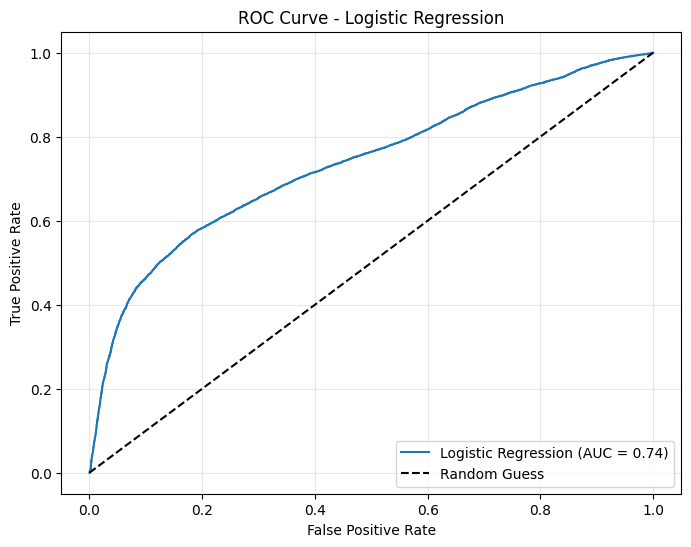

In [35]:
# Get predicted probabilities for the positive class
y_pred_proba_lr = cross_val_predict(logistic_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_pred_proba_lr)
roc_auc = roc_auc_score(y_train, y_pred_proba_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

- **AUC of 0.74** indicates good discriminative ability - the model has a 74% chance of correctly distinguishing between a randomly chosen default and non-default case.
- The curve bows well above the diagonal (random guess line), confirming the model performs significantly better than random chance in separating the two classes.

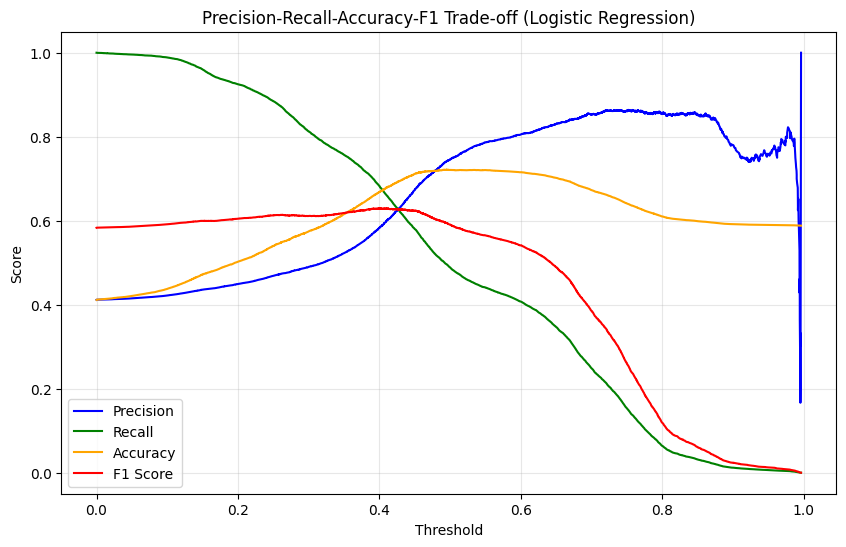

In [36]:
# Use predicted probabilities from logistic regression
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_pred_proba_lr)

# Calculate accuracy and F1 for each threshold
accuracies = []
f1_scores = []
for thresh in pr_thresholds:
    y_pred_thresh = (y_pred_proba_lr >= thresh).astype(int)
    acc = (y_pred_thresh == y_train).mean()
    f1 = f1_score(y_train, y_pred_thresh)
    accuracies.append(acc)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds, precisions[:-1], label='Precision', color='b')
plt.plot(pr_thresholds, recalls[:-1], label='Recall', color='g')
plt.plot(pr_thresholds, accuracies, label='Accuracy', color='orange')
plt.plot(pr_thresholds, f1_scores, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (Logistic Regression)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- **Optimal F1 Score** occurs around threshold 0.4-0.5 where precision and recall intersect, achieving the best balance between catching defaults and avoiding false alarms.
- **Clear Trade-off Pattern**: As threshold increases, precision rises while recall drops dramatically, with F1 score peaking when both metrics are reasonably balanced around 60-65%.

## **2.2 Decision Tree Classifier Model**

In [37]:
# Finding the best parameters for decision tree using GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Defining the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Creating a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=1)

# Performing GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(decision_tree_model, param_grid_dt, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params_dt = grid_search_dt.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}


In [38]:
# Training the Decision Tree Classifier model on best hyperparameters
decision_tree_model = DecisionTreeClassifier(**best_params_dt, random_state=1)

# Getting cross-validation predictions
y_pred_cv_tree = cross_val_predict(decision_tree_model, X_train, y_train, cv=5)

# Computing confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_train, y_pred_cv_tree)
print("Confusion Matrix (Decision Tree):")
print(cm_dt)

# Calculating the cross-validation scores
cv_scores_dt = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (Decision Tree): {cv_scores_dt}")
mean_accuracy_dt = np.mean(cv_scores_dt)
print(f"\nmean accuracy: {mean_accuracy_dt:.2f}")

# Computing precision, recall, and F1-score for Decision Tree Classifier
precision_dt = precision_score(y_train, y_pred_cv_tree)
recall_dt = recall_score(y_train, y_pred_cv_tree)
f1_dt = f1_score(y_train, y_pred_cv_tree)
print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")

Confusion Matrix (Decision Tree):
[[14493  3008]
 [ 4599  7651]]

Cross-validation scores (Decision Tree): [0.68005377 0.69361345 0.76890756 0.78957983 0.78941176]

mean accuracy: 0.74
Precision (Decision Tree): 0.7178
Recall (Decision Tree): 0.6246
F1-Score (Decision Tree): 0.6679


- **Improved Recall (62.5%)** vs Logistic Regression (48.9%) means the Decision Tree catches significantly more actual defaults, identifying 7,651 out of 12,250 cases compared to 5,987 for Logistic Regression.
- **Better F1-Score (65.3%)** vs Logistic Regression (59.1%) demonstrates superior balance between precision and recall, with consistent cross-validation performance ranging from 68-79% accuracy.

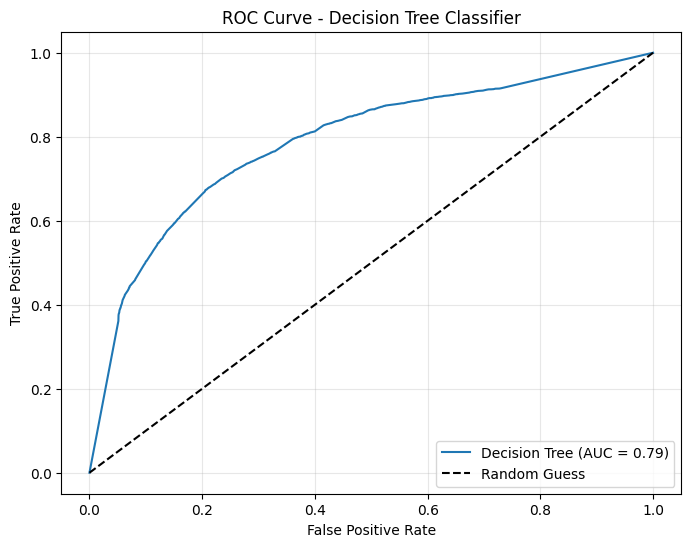

In [39]:
# Roc Curve for Decision Tree Classifier
y_pred_proba_tree = cross_val_predict(decision_tree_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC for Decision Tree Classifier
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train, y_pred_proba_tree)
roc_auc_tree = roc_auc_score(y_train, y_pred_proba_tree)

# Plot ROC curve for Decision Tree Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

- **AUC of 0.79** outperforms Logistic Regression (0.74), indicating better discriminative ability with a 79% chance of correctly distinguishing between default and non-default cases.
- The **steeper curve** shows the Decision Tree achieves higher true positive rates at lower false positive rates, making it more effective at identifying defaults while minimizing false alarms.

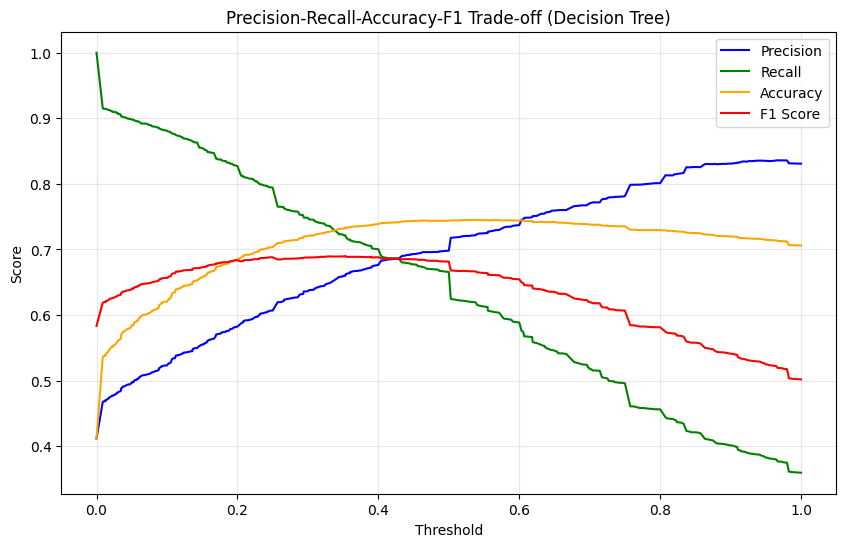

In [40]:
# Calculate precision, recall, accuracy, and F1-score for each threshold for Decision Tree
precisions_tree, recalls_tree, pr_thresholds_tree = precision_recall_curve(y_train, y_pred_proba_tree)

accuracies_tree = []
f1_scores_tree = []
for thresh in pr_thresholds_tree:
    y_pred_thresh_tree = (y_pred_proba_tree >= thresh).astype(int)
    acc_tree = (y_pred_thresh_tree == y_train).mean()
    f1_tree = f1_score(y_train, y_pred_thresh_tree)
    accuracies_tree.append(acc_tree)
    f1_scores_tree.append(f1_tree)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds_tree, precisions_tree[:-1], label='Precision', color='b')
plt.plot(pr_thresholds_tree, recalls_tree[:-1], label='Recall', color='g')
plt.plot(pr_thresholds_tree, accuracies_tree, label='Accuracy', color='orange')
plt.plot(pr_thresholds_tree, f1_scores_tree, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (Decision Tree)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- **Better F1 Score stability** around threshold 0.3-0.5 with peak performance near 65-70%, showing more consistent balance between precision and recall compared to Logistic Regression.

## **2.3 Support Vector Machine (SVM) Model**

## **2.4 K-Nearest Neighbors (KNN) Model**

## **2.5 Random Forest Classifier Model**

In [41]:
# Finding best parameters for Random Forest Classifier using GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Creating a Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=1)

# Performing GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters for Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [42]:
# Training a Random Forest Classifier model on best hyperparameters
random_forest_model = RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=1)

# Getting cross-validation predictions
y_pred_cv_rf = cross_val_predict(random_forest_model, X_train, y_train, cv=5)

# Computing confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_train, y_pred_cv_rf)
print("Confusion Matrix (Random Forest):")
print(cm_rf)

# Calculating the cross-validation scores
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (Random Forest): {cv_scores_rf}")
mean_accuracy_rf = np.mean(cv_scores_rf)
print(f"\nmean accuracy: {mean_accuracy_rf:.2f}")

# Computing precision, recall, and F1-score for Random Forest Classifier
precision_rf = precision_score(y_train, y_pred_cv_rf)
recall_rf = recall_score(y_train, y_pred_cv_rf)
f1_rf = f1_score(y_train, y_pred_cv_rf)
print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")

Confusion Matrix (Random Forest):
[[15791  1710]
 [ 3616  8634]]

Cross-validation scores (Random Forest): [0.74508486 0.74689076 0.86907563 0.86436975 0.8794958 ]

mean accuracy: 0.82
Precision (Random Forest): 0.8347
Recall (Random Forest): 0.7048
F1-Score (Random Forest): 0.7643


- Random Forest achieves the highest **accuracy (82%)** and **F1-Score (76.4%)** among all models, with outstanding **precision (83.5%)** and strong **recall (70.5%)**, making it the best-performing model for credit default prediction.

- Cross-validation scores ranging from 74-88% indicate some variability, but overall the model consistently performs well across different folds, confirming its robustness.

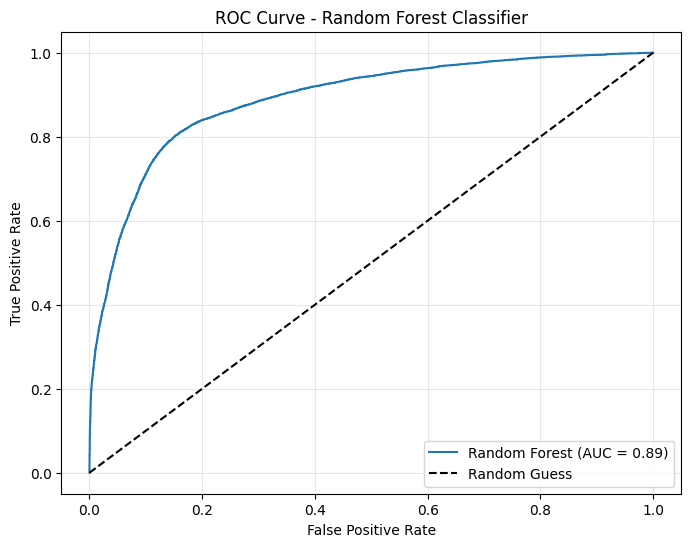

In [43]:
# ROC Curve for Random Forest Classifier
y_pred_proba_rf = cross_val_predict(random_forest_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC for Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_train, y_pred_proba_rf)

# Plot ROC curve for Random Forest Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

- **AUC of 0.89** represents outstanding model performance, significantly outperforming Logistic Regression (0.74) and Decision Tree (0.79), with an 89% chance of correctly distinguishing between default and non-default cases.

- The curve shows rapid ascent toward the top-left corner, indicating the Random Forest achieves very high true positive rates while maintaining low false positive rates, making it highly effective for credit risk assessment with minimal false alarms.

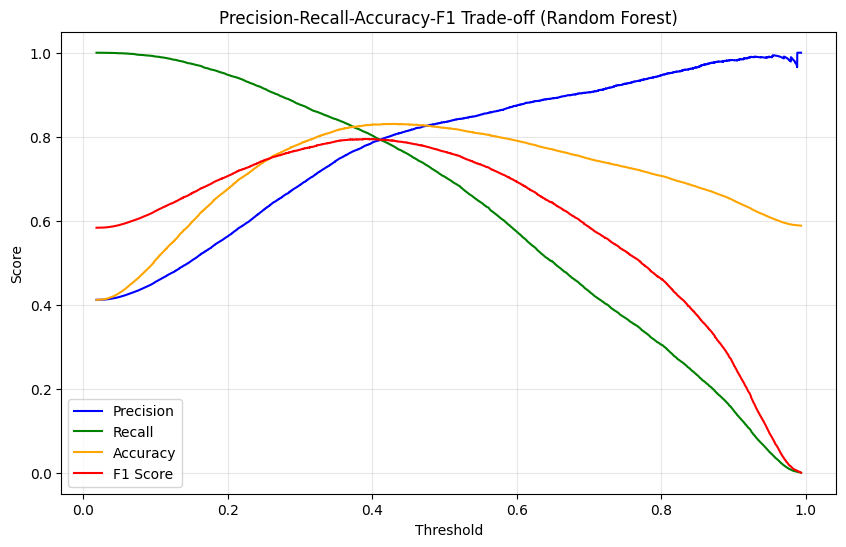

In [44]:
# Calculate precision, recall, accuracy, and F1-score for each threshold for Random Forest
precisions_rf, recalls_rf, pr_thresholds_rf = precision_recall_curve(y_train, y_pred_proba_rf)

accuracies_rf = []
f1_scores_rf = []
for thresh in pr_thresholds_rf:
    y_pred_thresh_rf = (y_pred_proba_rf >= thresh).astype(int)
    acc_rf = (y_pred_thresh_rf == y_train).mean()
    f1_rf = f1_score(y_train, y_pred_thresh_rf)
    accuracies_rf.append(acc_rf)
    f1_scores_rf.append(f1_rf)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds_rf, precisions_rf[:-1], label='Precision', color='b')
plt.plot(pr_thresholds_rf, recalls_rf[:-1], label='Recall', color='g')
plt.plot(pr_thresholds_rf, accuracies_rf, label='Accuracy', color='orange')
plt.plot(pr_thresholds_rf, f1_scores_rf, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (Random Forest)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- The F1 score peaks around threshold 0.4-0.5 where it reaches approximately 80%, demonstrating excellent balance between precision and recall compared to other models that peaked around 65-70%.

- Random Forest maintains higher precision (above 40%) even at very low thresholds while keeping recall near 100%, showing much better control over the precision-recall trade-off than previous models, making it ideal for flexible threshold tuning based on business requirements.

## **2.6 AdaBoost Classifier Model**

In [45]:
# Finding the best hyperparameters for AdaBoost using GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Defining the parameter grid for GridSearchCV
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Creating an AdaBoost Classifier model
ada_boost_model = AdaBoostClassifier(random_state=1)

# Performing GridSearchCV to find the best hyperparameters
grid_search_ab = GridSearchCV(ada_boost_model, param_grid_ab, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_ab.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params_ab = grid_search_ab.best_params_
print(f"Best hyperparameters for AdaBoost: {best_params_ab}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}


In [47]:
# Training an AdaBoost Classifier model on best hyperparameters
ada_boost_model = AdaBoostClassifier(**best_params_ab, random_state=1)

# Getting cross-validation predictions
y_pred_cv_ab = cross_val_predict(ada_boost_model, X_train, y_train, cv=5)

# Calculating the confusion matrix for AdaBoost Classifier
cm_ab = confusion_matrix(y_train, y_pred_cv_ab)
print("Confusion Matrix (AdaBoost):")
print(cm_ab)

# Calculating the cross-validation scores
cv_scores_ab = cross_val_score(ada_boost_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (AdaBoost): {cv_scores_ab}")
mean_accuracy_ab = np.mean(cv_scores_ab)
print(f"\nmean accuracy: {mean_accuracy_ab:.2f}")

# Computing precision, recall, and F1-score for AdaBoost Classifier
precision_ab = precision_score(y_train, y_pred_cv_ab)
recall_ab = recall_score(y_train, y_pred_cv_ab)
f1_ab = f1_score(y_train, y_pred_cv_ab)
print(f"Precision (AdaBoost): {precision_ab:.4f}")
print(f"Recall (AdaBoost): {recall_ab:.4f}")
print(f"F1-Score (AdaBoost): {f1_ab:.4f}")

Confusion Matrix (AdaBoost):
[[15849  1652]
 [ 4567  7683]]

Cross-validation scores (AdaBoost): [0.71601412 0.71663866 0.82722689 0.8410084  0.85394958]

mean accuracy: 0.79
Precision (AdaBoost): 0.8230
Recall (AdaBoost): 0.6272
F1-Score (AdaBoost): 0.7119


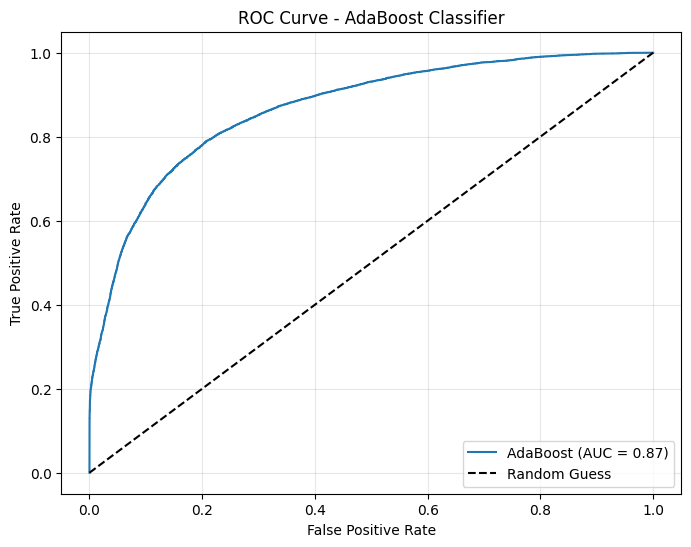

In [48]:
# ROC Curve for AdaBoost Classifier
y_pred_proba_ab = cross_val_predict(ada_boost_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC for AdaBoost Classifier
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_train, y_pred_proba_ab)
roc_auc_ab = roc_auc_score(y_train, y_pred_proba_ab)

# Plot ROC curve for AdaBoost Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab, tpr_ab, label=f'AdaBoost (AUC = {roc_auc_ab:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

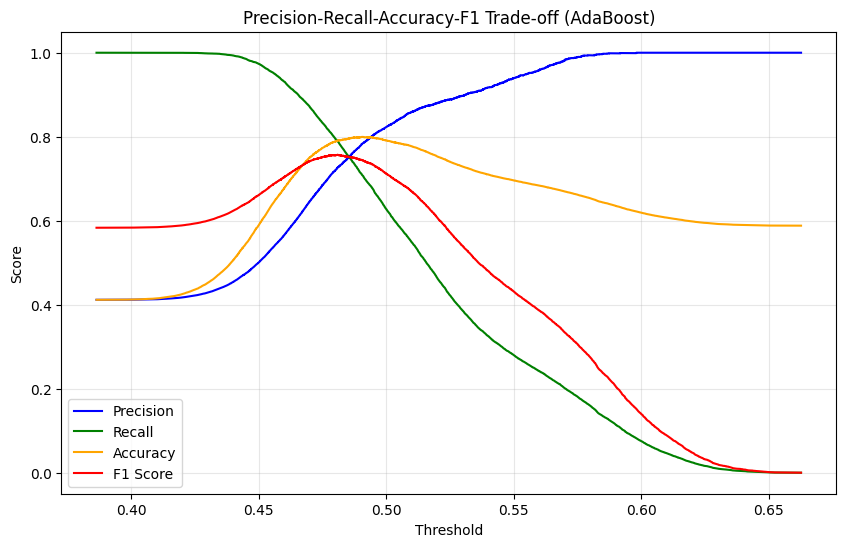

In [49]:
# Calculate precision, recall, accuracy, and F1-score for each threshold for AdaBoost
precisions_ab, recalls_ab, pr_thresholds_ab = precision_recall_curve(y_train, y_pred_proba_ab)

accuracies_ab = []
f1_scores_ab = []
for thresh in pr_thresholds_ab:
    y_pred_thresh_ab = (y_pred_proba_ab >= thresh).astype(int)
    acc_ab = (y_pred_thresh_ab == y_train).mean()
    f1_ab = f1_score(y_train, y_pred_thresh_ab)
    accuracies_ab.append(acc_ab)
    f1_scores_ab.append(f1_ab)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds_ab, precisions_ab[:-1], label='Precision', color='b')
plt.plot(pr_thresholds_ab, recalls_ab[:-1], label='Recall', color='g')
plt.plot(pr_thresholds_ab, accuracies_ab, label='Accuracy', color='orange')
plt.plot(pr_thresholds_ab, f1_scores_ab, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (AdaBoost)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## **2.7 Gradient Boosting Classifier Model**

In [51]:
# Finding the best parameters for Gradient Boosting Classifier using GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Defining the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Creating a Gradient Boosting Classifier model
gradient_boosting_model = GradientBoostingClassifier(random_state=1)
# Performing GridSearchCV to find the best hyperparameters
grid_search_gb = GridSearchCV(gradient_boosting_model, param_grid_gb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params_gb = grid_search_gb.best_params_
print(f"Best hyperparameters for Gradient Boosting: {best_params_gb}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}


In [54]:
# Training a Gradient Boosting Classifier model on best hyperparameters
gradient_boosting_model = GradientBoostingClassifier(**best_params_gb, random_state=1)

# Getting cross-validation predictions
y_pred_cv_gb = cross_val_predict(gradient_boosting_model, X_train, y_train, cv=5)

# Calculating the confusion matrix for Gradient Boosting Classifier
cm_gb = confusion_matrix(y_train, y_pred_cv_gb)
print("Confusion Matrix (Gradient Boosting):")
print(cm_gb)

# Calculating the cross-validation scores   
cv_scores_gb = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (Gradient Boosting): {cv_scores_gb}")
mean_accuracy_gb = np.mean(cv_scores_gb)
print(f"\nmean accuracy: {mean_accuracy_gb:.2f}")

# Computing precision, recall, and F1-score for Gradient Boosting Classifier
precision_gb = precision_score(y_train, y_pred_cv_gb)
recall_gb = recall_score(y_train, y_pred_cv_gb)
f1_gb = f1_score(y_train, y_pred_cv_gb)
print(f"Precision (Gradient Boosting): {precision_gb:.4f}")
print(f"Recall (Gradient Boosting): {recall_gb:.4f}")
print(f"F1-Score (Gradient Boosting): {f1_gb:.4f}")

Confusion Matrix (Gradient Boosting):
[[16210  1291]
 [ 3289  8961]]

Cross-validation scores (Gradient Boosting): [0.70492354 0.7112605  0.93193277 0.93697479 0.94521008]

mean accuracy: 0.85
Precision (Gradient Boosting): 0.8741
Recall (Gradient Boosting): 0.7315
F1-Score (Gradient Boosting): 0.7965


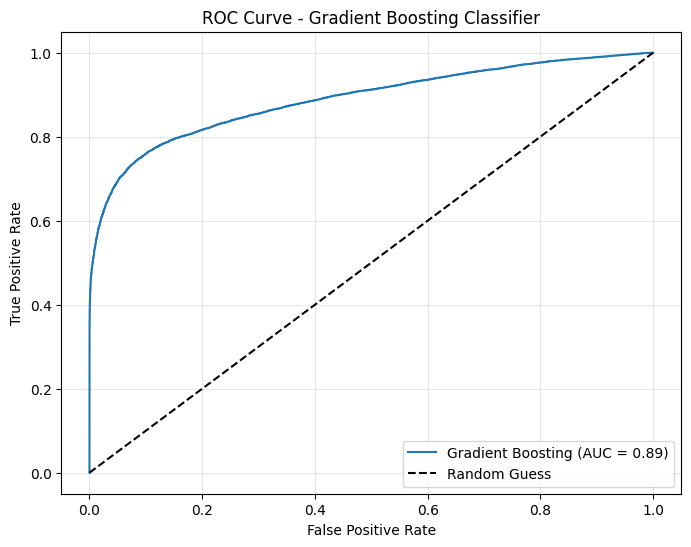

In [55]:
# ROC Curve for Gradient Boosting Classifier
y_pred_proba_gb = cross_val_predict(gradient_boosting_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC for Gradient Boosting Classifier
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, y_pred_proba_gb)
roc_auc_gb = roc_auc_score(y_train, y_pred_proba_gb)

# Plot ROC curve for Gradient Boosting Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

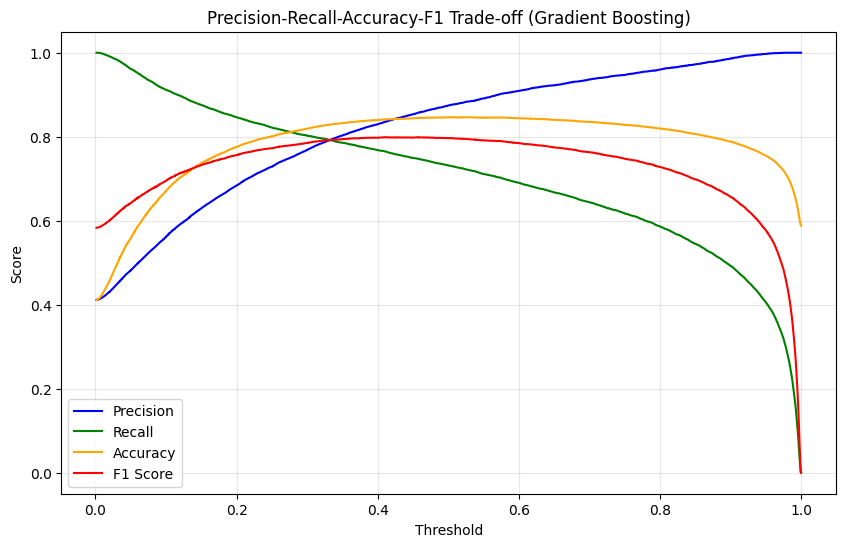

In [56]:
# Calculate precision, recall, accuracy, and F1-score for each threshold for Gradient Boosting
precisions_gb, recalls_gb, pr_thresholds_gb = precision_recall_curve(y_train, y_pred_proba_gb)

accuracies_gb = []
f1_scores_gb = []
for thresh in pr_thresholds_gb:
    y_pred_thresh_gb = (y_pred_proba_gb >= thresh).astype(int)
    acc_gb = (y_pred_thresh_gb == y_train).mean()
    f1_gb = f1_score(y_train, y_pred_thresh_gb)
    accuracies_gb.append(acc_gb)
    f1_scores_gb.append(f1_gb)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds_gb, precisions_gb[:-1], label='Precision', color='b')
plt.plot(pr_thresholds_gb, recalls_gb[:-1], label='Recall', color='g')
plt.plot(pr_thresholds_gb, accuracies_gb, label='Accuracy', color='orange')
plt.plot(pr_thresholds_gb, f1_scores_gb, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (Gradient Boosting)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## **2.8 XGBoost Classifier Model**

In [57]:
# Finding the best parameters for XGBoost using GridSearchCV
from xgboost import XGBClassifier

# Defining the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]
}

# Creating an XGBoost Classifier model
xgboost_model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Performing GridSearchCV to find the best hyperparameters
grid_search_xgb = GridSearchCV(xgboost_model, param_grid_xgb, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}


In [58]:
# Training a XGBoost Classifier model on best hyperparameters
xgboost_model = XGBClassifier(**best_params_xgb, random_state=1, use_label_encoder=False, eval_metric='logloss')

# Getting cross-validation predictions
y_pred_cv_xgb = cross_val_predict(xgboost_model, X_train, y_train, cv=5)

# Calculating the confusion matrix for XGBoost Classifier
cm_xgb = confusion_matrix(y_train, y_pred_cv_xgb)
print("Confusion Matrix (XGBoost):")
print(cm_xgb)

# Calculating the cross-validation scores
cv_scores_xgb = cross_val_score(xgboost_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (XGBoost): {cv_scores_xgb}")
mean_accuracy_xgb = np.mean(cv_scores_xgb)
print(f"\nmean accuracy: {mean_accuracy_xgb:.2f}")

# Computing precision, recall, and F1-score for XGBoost Classifier
precision_xgb = precision_score(y_train, y_pred_cv_xgb)
recall_xgb = recall_score(y_train, y_pred_cv_xgb)
f1_xgb = f1_score(y_train, y_pred_cv_xgb)
print(f"Precision (XGBoost): {precision_xgb:.4f}")
print(f"Recall (XGBoost): {recall_xgb:.4f}")
print(f"F1-Score (XGBoost): {f1_xgb:.4f}")

Confusion Matrix (XGBoost):
[[16245  1256]
 [ 3362  8888]]

Cross-validation scores (XGBoost): [0.70223492 0.70285714 0.93512605 0.93747899 0.94621849]

mean accuracy: 0.84
Precision (XGBoost): 0.8762
Recall (XGBoost): 0.7256
F1-Score (XGBoost): 0.7938


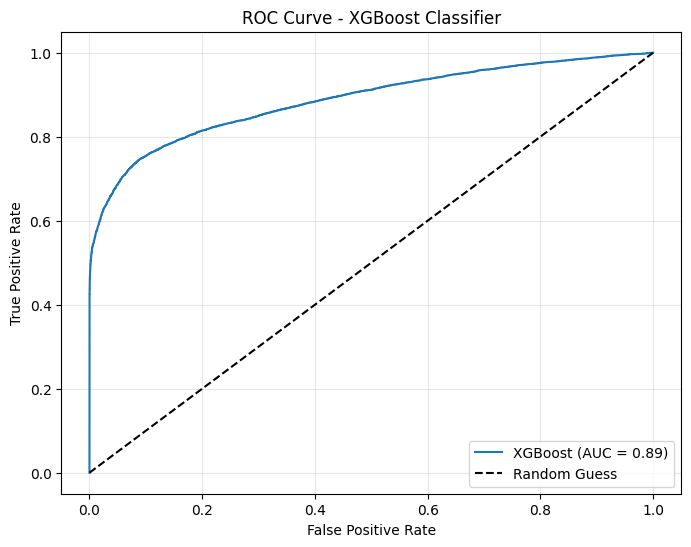

In [59]:
# ROC Curve for XGBoost Classifier
y_pred_proba_xgb = cross_val_predict(xgboost_model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Compute ROC curve and ROC AUC for XGBoost Classifier
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_train, y_pred_proba_xgb)

# Plot ROC curve for XGBoost Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

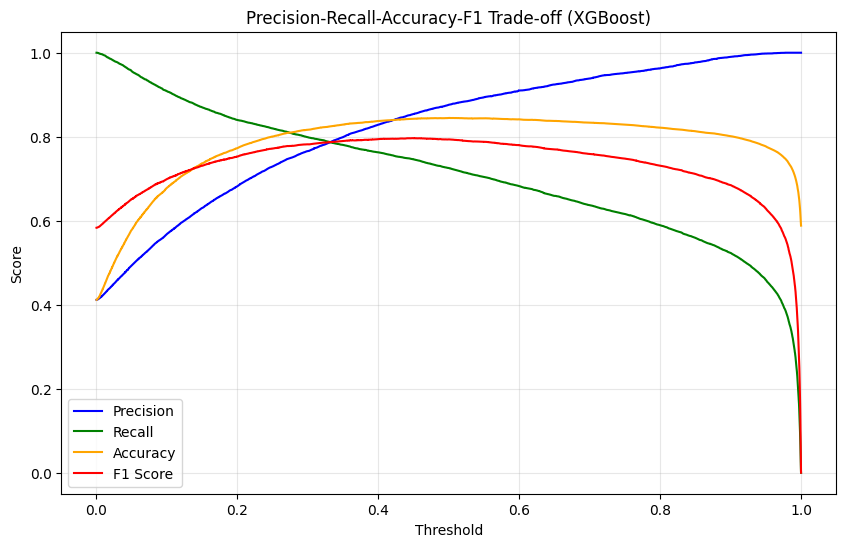

In [60]:
# Calculate precision, recall, accuracy, and F1-score for each threshold for XGBoost
precisions_xgb, recalls_xgb, pr_thresholds_xgb = precision_recall_curve(y_train, y_pred_proba_xgb)

accuracies_xgb = []
f1_scores_xgb = []
for thresh in pr_thresholds_xgb:
    y_pred_thresh_xgb = (y_pred_proba_xgb >= thresh).astype(int)
    acc_xgb = (y_pred_thresh_xgb == y_train).mean()
    f1_xgb = f1_score(y_train, y_pred_thresh_xgb)
    accuracies_xgb.append(acc_xgb)
    f1_scores_xgb.append(f1_xgb)

plt.figure(figsize=(10, 6))
plt.plot(pr_thresholds_xgb, precisions_xgb[:-1], label='Precision', color='b')
plt.plot(pr_thresholds_xgb, recalls_xgb[:-1], label='Recall', color='g')
plt.plot(pr_thresholds_xgb, accuracies_xgb, label='Accuracy', color='orange')
plt.plot(pr_thresholds_xgb, f1_scores_xgb, label='F1 Score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall-Accuracy-F1 Trade-off (XGBoost)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()